In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
DF = pd.DataFrame(df)

In [4]:
DF.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

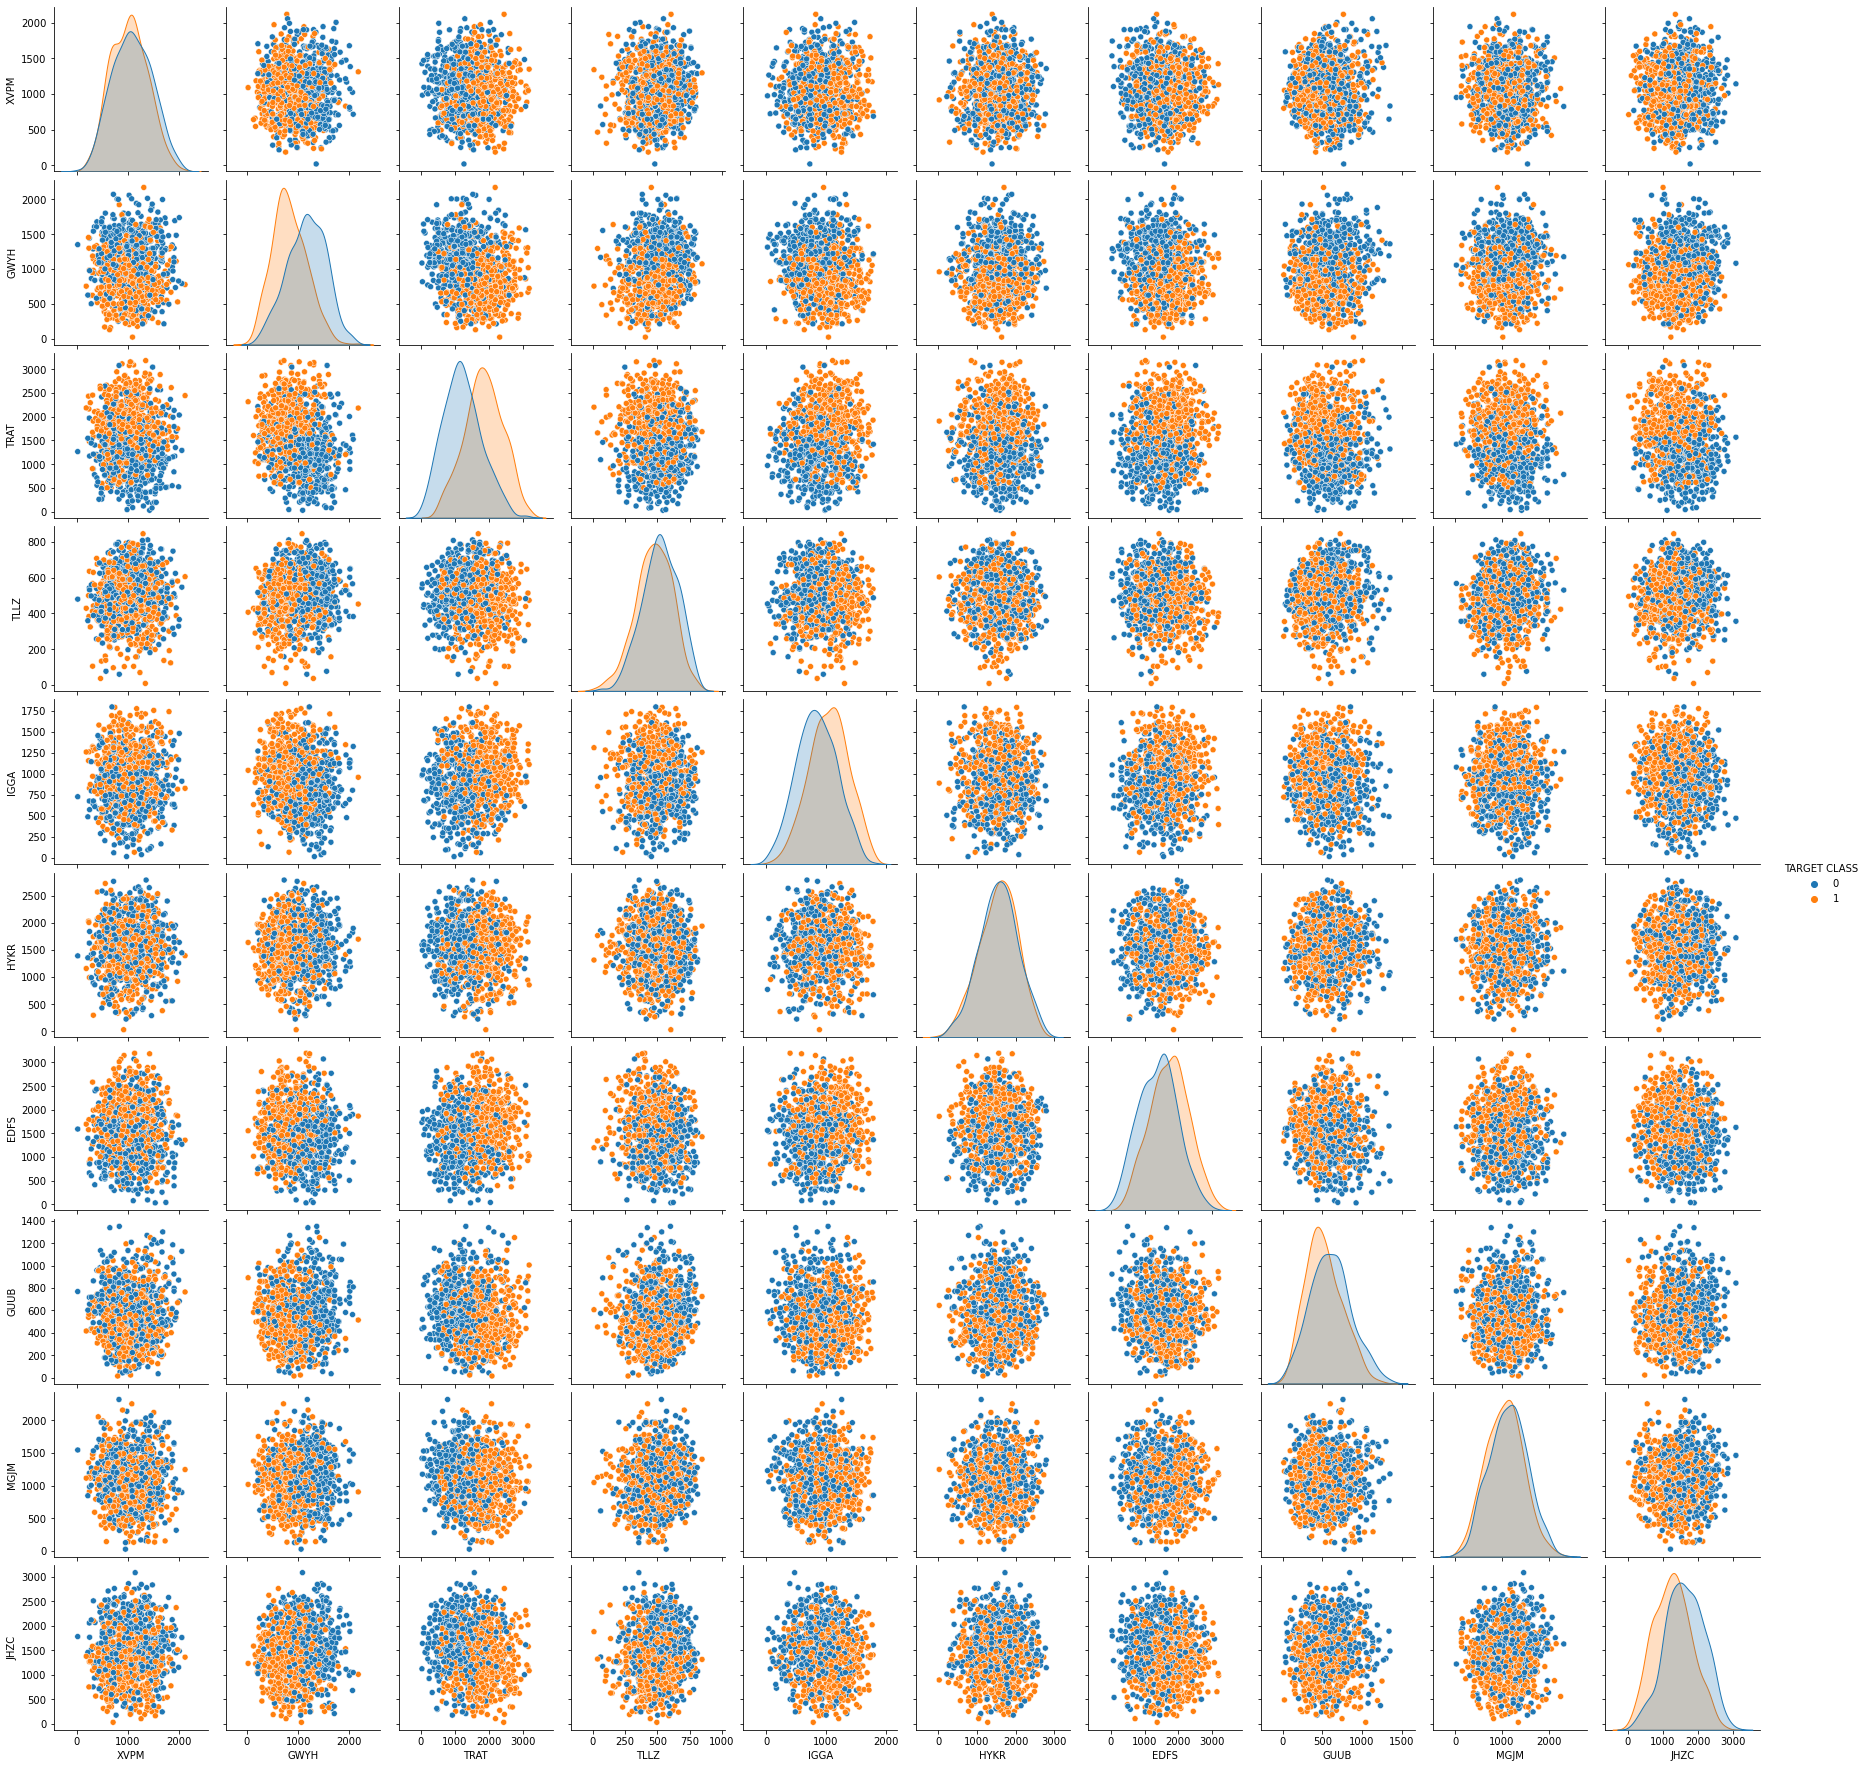

In [5]:
sns.pairplot(data=df,hue='TARGET CLASS')

In [6]:
from sklearn.preprocessing import StandardScaler


In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [9]:
scaler_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
df_feat = pd.DataFrame(scaler_features,columns = df.columns[:-1])

In [11]:
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_feat
y = df['TARGET CLASS']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier


In [16]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [17]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
prediciton = KNN.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(confusion_matrix(prediciton,y_test))

[[119  50]
 [ 44 117]]


In [28]:
print(classification_report(prediciton,y_test))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       169
           1       0.70      0.73      0.71       161

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



In [29]:
error_rate = []
for x in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    

In [30]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'Error Rate')

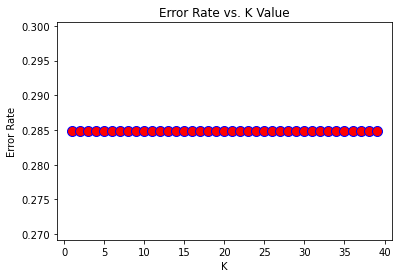

In [32]:
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


WITH K=30


[[141  22]
 [ 33 134]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       163
           1       0.86      0.80      0.83       167

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

